# Chapter 4 - Inferences with Gaussians

In [1]:
using Pkg
using DynamicPPL, Turing
using StatsPlots, Random
using LaTeXStrings
using CSV
using DataFrames
using SpecialFunctions

In [2]:
format=:png

:png

In [3]:
Random.seed!(6)

TaskLocalRNG()

## 4.1 Inferring a mean and standard deviation

$$ \mu \sim \text{Gaussian}(0, \sqrt{1000})  $$
$$ \sigma \sim \text{Uniform} (0, 10)  $$
$$ x_{i} \sim \text{Gaussian} (\mu, \sigma^2)  $$

┌ Info: Found initial step size
└   ϵ = 1.6
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


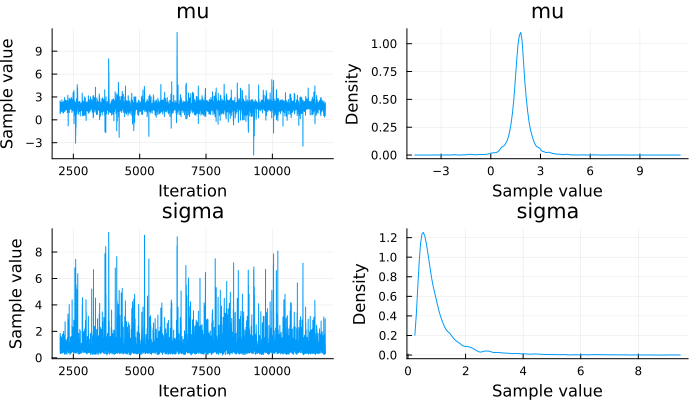

In [4]:
x = [1.1, 1.9, 2.3, 1.8]

@model function GaussianModel(x)
    mu ~ Normal(0, sqrt(1000))
    sigma ~ Uniform(0, 10.0)

    for i in eachindex(x)
        x[i] ~ Normal(mu, sigma)
    end
end

iterations = 10_000

chain = sample(GaussianModel(x), NUTS(2000, 0.9), iterations)
plot(chain, size=(700, 400), fmt=format)

In [5]:
chain

Chains MCMC chain (10000×14×1 Array{Float64, 3}):

Iterations        = 2001:1:12000
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 4.7 seconds
Compute duration  = 4.7 seconds
parameters        = mu, sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

          mu    1.7854    0.6749    0.0177   2384.8687   1962.5608    1.0003   ⋯
       sigma    1.0173    0.9040    0.0243   1622.4671   2062.1245    1.0006   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

    

┌ Warning: Keyword argument `orientation` is deprecated.
│ Please use `permute` instead.
└ @ Plots ~/.julia/packages/Plots/3BCH5/src/args.jl:1552


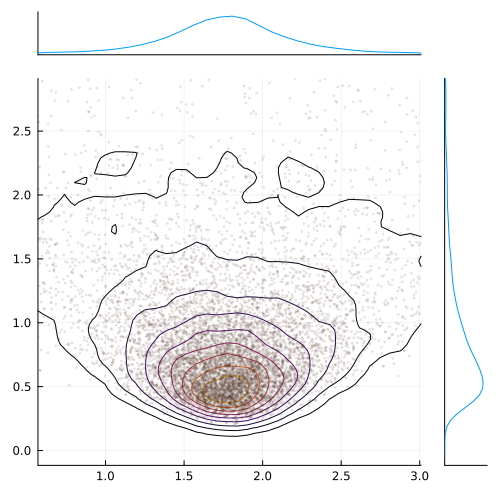

In [6]:
p = marginalkde(chain[:mu], chain[:sigma], 
    size=(500, 500), fmt=format)
scatter!(p.subplots[2], chain[:mu], chain[:sigma], 
    alpha=0.1, markersize=1)

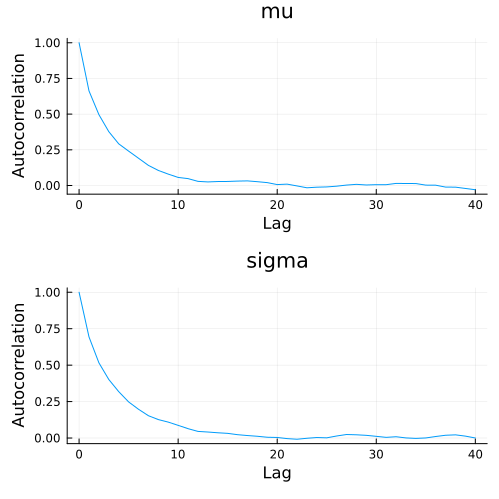

In [7]:
autocorplot(chain, fmt=format)

## 4.2 The seven scientists

$$ \mu \sim \text{Gaussian}(0, \sqrt{1000})  $$
$$ \lambda_{i} \sim \text{Gamma} (k=.001, \theta = 1 / .001)  $$
$$ \sigma_{i} = 1/{\sqrt\lambda_{i}} $$  
$$ x_{i} \sim \text{Gaussian} (\mu, \sigma_{i})  $$

┌ Info: Found initial step size
└   ϵ = 3.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


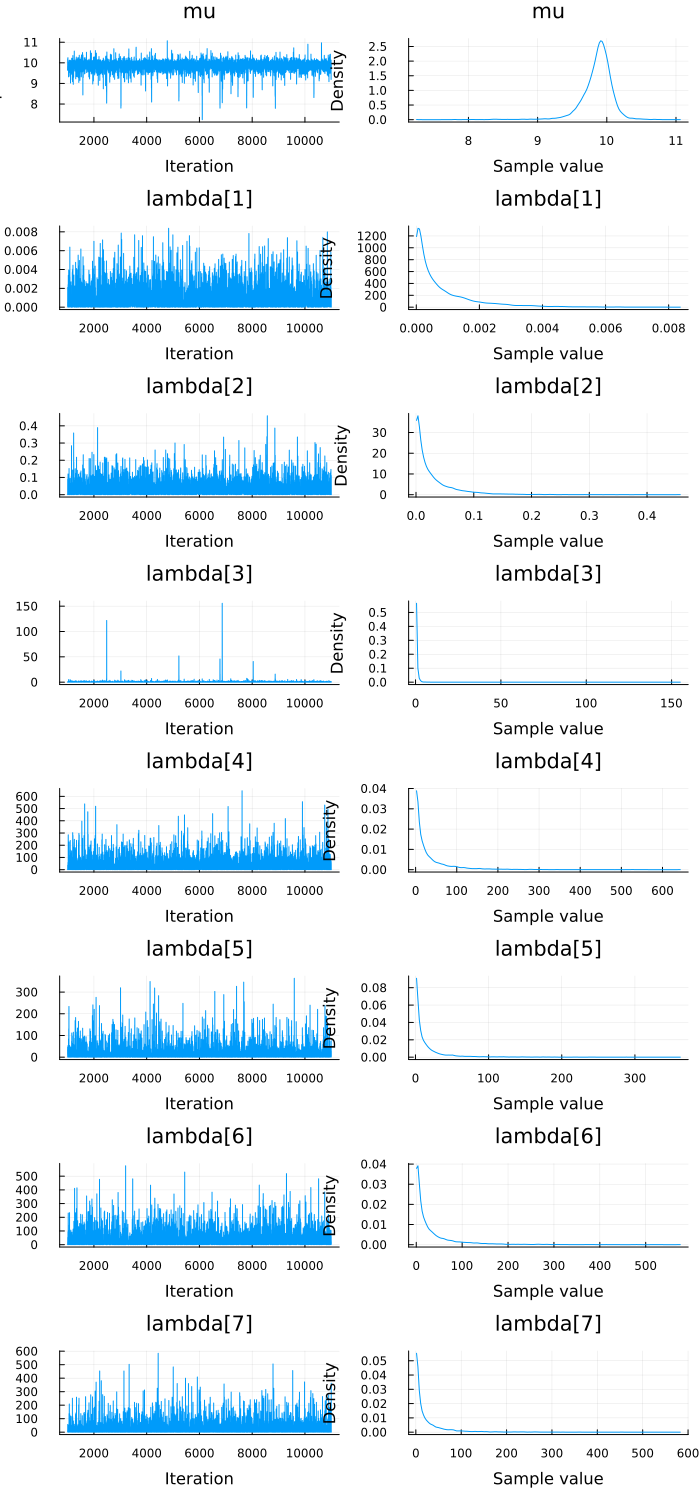

In [8]:
x = [-27.020, 3.570, 8.191, 9.898, 9.603, 9.945, 10.056]

@model function SvenScientists(x)
    mu ~ Normal(0, sqrt(1000))

    # α và θ ó =)) hỏng phải 
    lambda ~ filldist(Gamma(0.01, 1 / 0.01), 7)
    sigma = 1 ./ (sqrt.(lambda))

    for i in eachindex(x)
        x[i] ~ Normal(mu, sigma[i])
    end
end

iterations = 10_000
burnin = 5_000

chain = sample(SvenScientists(x), NUTS(), iterations, burnin=burnin)
plot(chain, size=(700, 1500), fmt=format)

In [9]:
chain

Chains MCMC chain (10000×20×1 Array{Float64, 3}):

Iterations        = 1001:1:11000
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 3.06 seconds
Compute duration  = 3.06 seconds
parameters        = mu, lambda[1], lambda[2], lambda[3], lambda[4], lambda[5], lambda[6], lambda[7]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

          mu    9.8622    0.2378    0.0046   4370.9203   3145.4158    1.0000   ⋯
   lambda[1]    0.0008    0.0010    0.0000   2333.5266   1637.3133    1.0005   ⋯
   lambda[2]    0.0267    0.0374    0.0004   3407.4539   2248.5306    1.0003   ⋯
   lambda[3]    0.4577    2.4795    0.0363   3236.6200   2202.6515    1.

In [10]:
?Turing.Gamma

```
Gamma(α,θ)
```

The *Gamma distribution* with shape parameter `α` and scale `θ` has probability density function

$$
f(x; \alpha, \theta) = \frac{x^{\alpha-1} e^{-x/\theta}}{\Gamma(\alpha) \theta^\alpha},
\quad x > 0
$$

```julia
Gamma()          # Gamma distribution with unit shape and unit scale, i.e. Gamma(1, 1)
Gamma(α)         # Gamma distribution with shape α and unit scale, i.e. Gamma(α, 1)
Gamma(α, θ)      # Gamma distribution with shape α and scale θ

params(d)        # Get the parameters, i.e. (α, θ)
shape(d)         # Get the shape parameter, i.e. α
scale(d)         # Get the scale parameter, i.e. θ
```

External links

  * [Gamma distribution on Wikipedia](http://en.wikipedia.org/wiki/Gamma_distribution)


## 4.3 Repeated measurement of IQ


$$ \mu_{i} \sim \text{Uniform}(0, 300)  $$
$$ \sigma \sim \text{Uniform} (0, 100)  $$
$$ x_{ij} \sim \text{Gaussian} (\mu_{i}, \sigma)  $$

┌ Info: Found initial step size
└   ϵ = 0.4
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


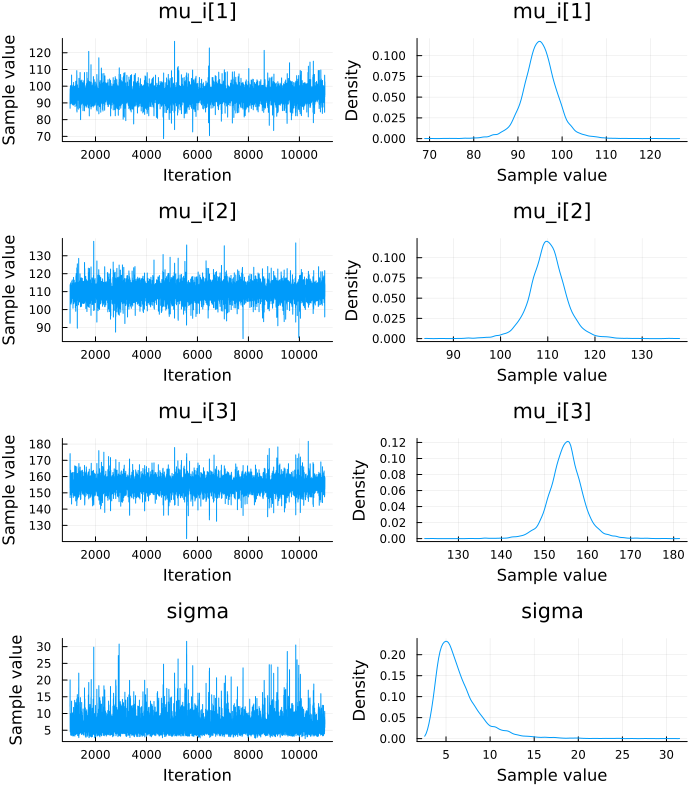

In [11]:
x = [[90, 95, 100], [105, 110, 115], [150, 155, 160]]

@model function RepeatedMeasurementIQ(x)
    mu_i ~ filldist(Uniform(0, 300.0), 3)
    sigma ~ Uniform(0, 100.0)

    for i in eachindex(x)
        for j in eachindex(x[i])
            x[i][j] ~ Normal(mu_i[i], sigma)
        end
    end
end

iterations = 10_000
burnin = 5_000

chain = sample(RepeatedMeasurementIQ(x), NUTS(),
    iterations, burnin=burnin, fmt=format)
plot(chain, size=(700, 800), fmt=format)

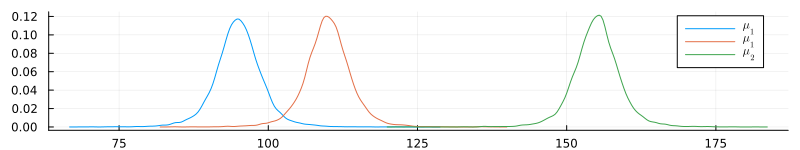

In [12]:
density(chain[:"mu_i[1]"], 
    size=(800, 150), label=L"\mu_1", fmt=format)
density!(chain[:"mu_i[2]"], label=L"\mu_1")
density!(chain[:"mu_i[3]"], label=L"\mu_2")

In [13]:
chain

Chains MCMC chain (10000×16×1 Array{Float64, 3}):

Iterations        = 1001:1:11000
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 2.14 seconds
Compute duration  = 2.14 seconds
parameters        = mu_i[1], mu_i[2], mu_i[3], sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters       mean       std      mcse    ess_bulk    ess_tail      rhat  ⋯
      Symbol    Float64   Float64   Float64     Float64     Float64   Float64  ⋯

     mu_i[1]    94.9778    4.1055    0.0492   7362.3531   4456.9618    1.0018  ⋯
     mu_i[2]   109.9935    4.0535    0.0455   8725.3254   5605.0749    1.0009  ⋯
     mu_i[3]   155.0046    4.0318    0.0448   8130.7419   5347.6179    1.0004  ⋯
       sigma     6.4934    2.7104    0.0502   3346.2358   4059.8225    1.0015  ⋯
                                      

In [14]:
Pkg.status()

Status `~/quangtiencs_projects/bayesian-cognitive-modeling-with-turing.jl/Project.toml`
  [336ed68f] CSV v0.10.11
  [a93c6f00] DataFrames v1.6.1
⌃ [366bfd00] DynamicPPL v0.23.0
  [7073ff75] IJulia v1.24.2
  [5ab0869b] KernelDensity v0.6.7
  [b964fa9f] LaTeXStrings v1.3.0
  [2ab3a3ac] LogExpFunctions v0.3.24
  [91a5bcdd] Plots v1.38.17
  [37e2e3b7] ReverseDiff v1.15.0
  [276daf66] SpecialFunctions v2.3.0
  [f3b207a7] StatsPlots v0.15.6
  [fce5fe82] Turing v0.28.1
  [e88e6eb3] Zygote v0.6.62
Info Packages marked with ⌃ have new versions available and may be upgradable.
